[View in Colaboratory](https://colab.research.google.com/github/raghavchalapathy/one_class_neural_networks/blob/master/RCAE_CIFAR10_Experiments_Bird_Vs_All_New.ipynb)

In [1]:
from google.colab import drive
drive.mount('/content/drive')
# !pip install picklable_itertools
# !pip install fuel

Mounted at /content/drive


In [0]:
%matplotlib inline
import numpy as np
np.random.seed(42)

In [0]:
%reload_ext autoreload
%autoreload 2

PROJECT_DIR = "/content/drive/My Drive/2018/Colab_Deep_Learning/one_class_neural_networks/"
import sys,os
import numpy as np
sys.path.append(PROJECT_DIR)


## Obtain Training and Test Datasets

Using TensorFlow backend.
/content/drive/My Drive/2018/Colab_Deep_Learning/one_class_neural_networks/src/utils/visualization/mosaic_plot.py:2: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.6/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/kernelapp.py", line 477, in start
    io

RCAE.RESULT_PATH: /content/drive/My Drive/2018/Colab_Deep_Learning/one_class_neural_networks//reports/figures/cifar10/RCAE/
[INFO:] Loading data...
Inside the CIFAR10_DataLoader RCAE.RESULT_PATH: /content/drive/My Drive/2018/Colab_Deep_Learning/one_class_neural_networks/reports/figures/cifar10/RCAE/
[INFO:] Loading data...
[INFO:] Assertions of memory muted
[INFO:] Loading data...
Inside the CIFAR10_DataLoader RCAE.RESULT_PATH: /content/drive/My Drive/2018/Colab_Deep_Learning/one_class_neural_networks/reports/figures/cifar10/RCAE/
[INFO:] Loading data...
Train Data Shape:  (5500, 32, 32, 3)
Train Label Shape:  (5500,)
Validation Data Shape:  (5500, 32, 32, 3)
Validation Label Shape:  (5500,)
Test Data Shape:  (5500, 32, 32, 3)
Test Label Shape:  (5500,)
===========TRAINING AND PREDICTING WITH RCAE============================
[INFO:]  Length of Positive data 5000
[INFO:]  Length of Negative data 500
[INFO:] X_test.shape (5500, 32, 32, 3)
[INFO:] y_test.shape [ 1.  1.  1. ... -1. -1. -1.

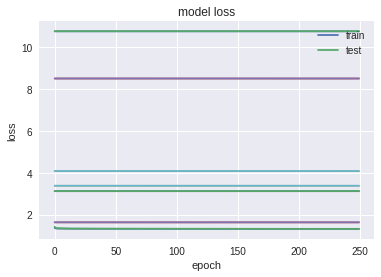

In [4]:
## Obtaining the training and testing data
%reload_ext autoreload
%autoreload 2

from src.models.RCAE import RCAE_AD

DATASET = "cifar10"
IMG_DIM= 3072
IMG_HGT =32
IMG_WDT=32
IMG_CHANNEL=1
HIDDEN_LAYER_SIZE= 128
MODEL_SAVE_PATH = PROJECT_DIR + "/models/cifar10/RCAE/"
REPORT_SAVE_PATH = PROJECT_DIR + "/reports/figures/cifar10/RCAE/"
PRETRAINED_WT_PATH = ""

rcae = RCAE_AD(DATASET,IMG_DIM, HIDDEN_LAYER_SIZE, IMG_HGT, IMG_WDT,IMG_CHANNEL, MODEL_SAVE_PATH, REPORT_SAVE_PATH,PRETRAINED_WT_PATH)

print("Train Data Shape: ",rcae.data._X_train.shape)
print("Train Label Shape: ",rcae.data._y_train.shape)
print("Validation Data Shape: ",rcae.data._X_val.shape)
print("Validation Label Shape: ",rcae.data._y_val.shape)
print("Test Data Shape: ",rcae.data._X_test.shape)
print("Test Label Shape: ",rcae.data._y_test.shape)
print("===========TRAINING AND PREDICTING WITH RCAE============================")
rcae.fit_and_predict()
print("========================================================================")


### Pretrain Autoencoder

In [0]:
%reload_ext autoreload
%autoreload 2
DATASET = "MNIST"
IMG_DIM= 784
IMG_HGT =28
IMG_WDT=28
IMG_CHANNEL=1
HIDDEN_LAYER_SIZE= 128
MODEL_SAVE_PATH = PROJECT_DIR + "/models/MNIST/Deep_SVDD/"
REPORT_SAVE_PATH = PROJECT_DIR + "/reports/figures/MNIST/Deep_SVDD/"
PRETRAINED_WT_PATH = ""

## Prepare the data for pretraining CAE
x_train = trainX.reshape((len(trainX), 28, 28, 1))
x_trainForWtInit= x_train

test_ones = test_ones.reshape((len(test_ones), 28, 28, 1))
test_sevens = test_sevens.reshape((len(test_sevens), 28, 28, 1))
x_test = np.concatenate((test_ones,test_sevens))

print("Reshaped Training samples for CAE",x_train.shape)
print("Reshaped Testing samples for CAE",x_test.shape)

from src.models.Deep_SVDD import Deep_SVDD
deep_svdd =   Deep_SVDD(DATASET,x_trainForWtInit,IMG_DIM,HIDDEN_LAYER_SIZE,IMG_HGT,IMG_WDT,IMG_CHANNEL,MODEL_SAVE_PATH,REPORT_SAVE_PATH,PRETRAINED_WT_PATH)


NameError: name 'trainX' is not defined

In [0]:
Deep_SVDD()

(28, 28, 1)

## Train and Test  FF_NN Model Supervised Model

In [0]:
%reload_ext autoreload
%autoreload 2
IMG_DIM= 784
IMG_HGT =28
IMG_WDT=28
IMG_DEPTH=1
HIDDEN_LAYER_SIZE=196

MODEL_SAVE_PATH = PROJECT_DIR + "/models/MNIST/FF_NN/"
REPORT_SAVE_PATH = PROJECT_DIR + "/reports/figures/MNIST/FF_NN/"

print("[INFO]",train_Anomaly_X.shape[0],"Anomalous Samples Appended to training set")
data_train = np.concatenate((trainX,train_Anomaly_X),axis=0)
data_train_label = np.concatenate((trainY,train_Anomaly_Y),axis=0)
print("[INFO]",data_train.shape[0],"Training Samples Contains both 1's and 7s")
nClass =2
NUM_EPOCHS = 100

clf_FF_NN =  FF_NN(IMG_DIM,HIDDEN_LAYER_SIZE,IMG_HGT,IMG_WDT,MODEL_SAVE_PATH,REPORT_SAVE_PATH)
clf_FF_NN.fit(data_train,data_train_label,NUM_EPOCHS,IMG_HGT,IMG_WDT,IMG_DEPTH,nClass)

## Predict the scores 
auc_FF_NN = clf_FF_NN.score(test_ones,label_ones,test_sevens,label_sevens)
print("===========")
print("AUC: ",auc_FF_NN)
print("===========")

NameError: name 'train_Anomaly_X' is not defined

## FakeNoise FF_NN Model

[INFO] 5000 Noise Samples Appended for training set
[INFO] compiling model...
[INFO] training network...
[INFO] serializing network...
[INFO] loading network...
5050 Actual test samples
5050 Predicted test samples
auccary_score: 0.8998019801980198
roc_auc_score: 0.5534
y_true [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
y_pred [1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0
 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0]
AUC:  0.5534


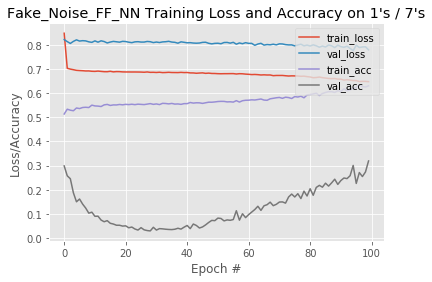

In [0]:
## Fake Noise data to be generated which will be added to the training set before training
%reload_ext autoreload
%autoreload 2

IMG_DIM= 784
IMG_HGT =28
IMG_WDT=28
IMG_DEPTH=1
HIDDEN_LAYER_SIZE=196

MODEL_SAVE_PATH = PROJECT_DIR + "/models/MNIST/FAKE_NOISE_FF_NN/"
REPORT_SAVE_PATH = PROJECT_DIR + "/reports/figures/MNIST/FAKE_NOISE_FF_NN/"


from src.models.Fake_Noise_FF_NN import Fake_Noise_FF_NN
## Remove the Anomalous data and instead add Noise
X_Noise,X_NoiseLabel = createData.get_FAKE_Noise_MNIST_TrainingData(trainX)
print("[INFO]",X_Noise.shape[0],"Noise Samples Appended for training set")
data_train = np.concatenate((trainX,X_Noise),axis=0)
data_train_label = np.concatenate((trainY,X_NoiseLabel),axis=0)


clf_FakeNoise_FF_NN =   Fake_Noise_FF_NN(IMG_DIM,HIDDEN_LAYER_SIZE,IMG_HGT,IMG_WDT,MODEL_SAVE_PATH,REPORT_SAVE_PATH)
clf_FakeNoise_FF_NN.fit(data_train,data_train_label,NUM_EPOCHS,IMG_HGT,IMG_WDT,IMG_DEPTH,nClass)
# Predict the scores 

auc_FAKENOISE_FF_NN = clf_FakeNoise_FF_NN.score(test_ones,label_ones,test_sevens,label_sevens)
print("===========")
print("AUC: ",auc_FAKENOISE_FF_NN)
print("===========")

## SKlearn OCSVM

Training the OCSVM classifier.....
AUC: 0.7869240000000001
Training the OCSVM classifier.....
AUC: 0.9705560000000001


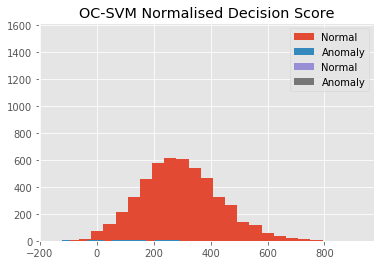

In [0]:
%reload_ext autoreload
%autoreload 2
##create the classifier
from src.models.ocsvmSklearn import OCSVM
IMG_HGT =28
IMG_WDT=28
ocsvm = OCSVM(IMG_HGT,IMG_WDT)
nu= 0.01
kernel = 'linear'
clf = ocsvm.fit(trainX,nu,kernel)
res = ocsvm.score(clf,test_ones,test_sevens)
auc_OCSVM_linear = res
print("="*35)
print("AUC:",res)
print("="*35)

kernel = 'rbf'
clf = ocsvm.fit(trainX,nu,kernel)
res = ocsvm.score(clf,test_ones,test_sevens)
auc_OCSVM_rbf = res
print("="*35)
print("AUC:",res)
print("="*35)

## OC-NN

[INFO] compiling model...
[INFO]  (196,) input  --> hidden layer weights shape ...
[INFO]  (2,) hidden --> output layer weights shape ...
[INFO] training network...
Train on 4500 samples, validate on 500 samples
Epoch 1/100
4500/4500 [==============================] - 0s 63us/step - loss: 44.2036 - val_loss: 43.6791
evaluation for epoch: 0
output: Tensor("Print:0", shape=(?, 2), dtype=float32)
Epoch 2/100
4500/4500 [==============================] - 0s 29us/step - loss: 44.1708 - val_loss: 43.7103
evaluation for epoch: 1
output: Tensor("Print_1:0", shape=(?, 2), dtype=float32)
Epoch 3/100
4500/4500 [==============================] - 0s 29us/step - loss: 44.1486 - val_loss: 43.7392
evaluation for epoch: 2
output: Tensor("Print_2:0", shape=(?, 2), dtype=float32)
Epoch 4/100
4500/4500 [==============================] - 0s 29us/step - loss: 44.1274 - val_loss: 43.7661
evaluation for epoch: 3
output: Tensor("Print_3:0", shape=(?, 2), dtype=float32)
Epoch 5/100
4500/4500 [===================

4500/4500 [==============================] - 0s 31us/step - loss: 42.8262 - val_loss: 44.2463
evaluation for epoch: 85
output: Tensor("Print_85:0", shape=(?, 2), dtype=float32)
Epoch 87/100
4500/4500 [==============================] - 0s 30us/step - loss: 42.8114 - val_loss: 44.2472
evaluation for epoch: 86
output: Tensor("Print_86:0", shape=(?, 2), dtype=float32)
Epoch 88/100
4500/4500 [==============================] - 0s 30us/step - loss: 42.7966 - val_loss: 44.2481
evaluation for epoch: 87
output: Tensor("Print_87:0", shape=(?, 2), dtype=float32)
Epoch 89/100
4500/4500 [==============================] - 0s 30us/step - loss: 42.7819 - val_loss: 44.2487
evaluation for epoch: 88
output: Tensor("Print_88:0", shape=(?, 2), dtype=float32)
Epoch 90/100
4500/4500 [==============================] - 0s 30us/step - loss: 42.7671 - val_loss: 44.2499
evaluation for epoch: 89
output: Tensor("Print_89:0", shape=(?, 2), dtype=float32)
Epoch 91/100
4500/4500 [==============================] - 0s 29

/Users/raghav/envPython3/lib/python3.6/site-packages/keras/engine/sequential.py:252: UserWarning: Network returning invalid probability values. The last layer might not normalize predictions into probabilities (like softmax or sigmoid would).
  warnings.warn('Network returning invalid probability values. '


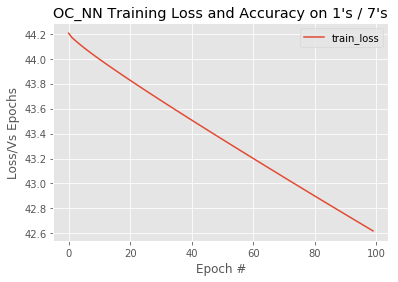

In [0]:
##create the classifier
## Instantiate the object and call the function

%reload_ext autoreload
%autoreload 2
DATASET= "MNIST"
IMG_DIM= 784
IMG_HGT =28
IMG_WDT=28
IMG_DEPTH=1
HIDDEN_LAYER_SIZE=196
nClass=2
MODEL_SAVE_PATH = PROJECT_DIR + "/models/MNIST/OC_NN/"
REPORT_SAVE_PATH = PROJECT_DIR + "/reports/figures/MNIST/OC_NN/"
PRE_TRAINED_WT_PATH = PROJECT_DIR +"/models/MNIST/FF_NN/"

from src.models.OC_NN import OC_NN
import keras

ocnn = OC_NN(DATASET,IMG_DIM,HIDDEN_LAYER_SIZE,IMG_HGT,IMG_WDT,MODEL_SAVE_PATH,REPORT_SAVE_PATH,PRE_TRAINED_WT_PATH)


nu= 0.01
NUM_EPOCHS = 100
ocnn.fit(trainX,nu,NUM_EPOCHS,IMG_HGT,IMG_WDT,IMG_DEPTH,nClass)
res = ocnn.score(test_ones,test_sevens) 
auc_OCNN = res

print("="*35)
print("AUC:",res)
print("="*35)



## Comparing  AUC scores of various methods

Text(0.5,1,'AUC Comparision for MNIST Dataset ')

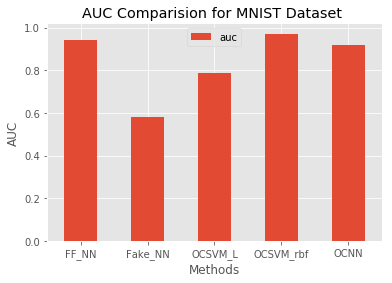

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

auc = np.zeros((1,5))
auc[0][0] = auc_FF_NN
auc[0][1] = auc_FAKENOISE_FF_NN
auc[0][2] = auc_OCSVM_linear
auc[0][3] = auc_OCSVM_rbf
auc[0][4] = auc_OCNN


aucList = [auc_FF_NN,auc_FAKENOISE_FF_NN, auc_OCSVM_linear,auc_OCSVM_rbf, auc_OCNN]

index = ['FF_NN', 'Fake_NN', 'OCSVM_L','OCSVM_rbf','OCNN']
df = pd.DataFrame({'auc': aucList}, index=index)
ax = df.plot.bar(rot=0)

plt.ylabel('AUC')
plt.xlabel('Methods')
plt.title('AUC Comparision for MNIST Dataset ')